This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fconference-ia/master?urlpath=lab/tree/notebooks/2_discriminant_analysis/)

*Taken from scikit-learn example*

In [1]:
%matplotlib inline

# Normal and Shrinkage Linear Discriminant Analysis for classification

We consider a high dimension framework by adding useless variables (noise)

This notebook shows that
- as the dimension increases, the prediction problem becomes much more difficult: this is known as the *curse of dimensionality*
- regularization, here the shrinkage explained in the previous notebooks, improves classification especially for large dimensions

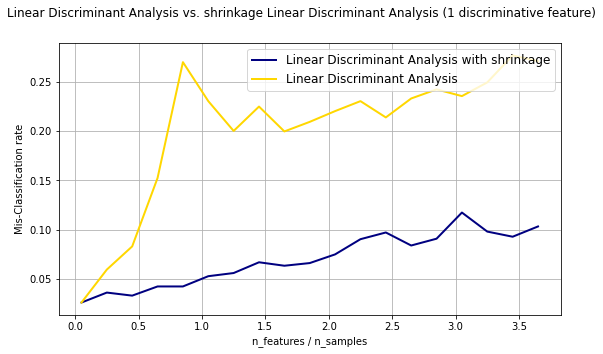

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise!
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

mcr_clf1, mcr_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    mcr_clf1.append(1-score_clf1 / n_averages)
    mcr_clf2.append(1-score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.figure(figsize=(9,5))
plt.plot(features_samples_ratio, mcr_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, mcr_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Mis-Classification rate')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')
plt.grid("on")
plt.show()

## Exercise:
Can you explain
- why the performance of standard (without regulariaztion/shrinkage) LDA decreases with the number of features?
- why the regularization/shrinkage allows us to mitigate the curse of dimensionality?